<a href="https://colab.research.google.com/github/silvererudite/simulationAndModeling/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import sympy
from sympy import *
import matplotlib.pyplot as plt
from sympy.plotting import plot
plt.rcParams['figure.figsize'] = 10, 5
init_printing(use_unicode=True)

In [60]:
x, t=symbols('x, t')
eqn1= (exp(-(x-3*t)**2))*sin(3*pi*(x-t)) #Defining the equation
pprint(eqn1)

            2                    
 -(-3⋅t + x)                     
ℯ            ⋅sin(π⋅(-3⋅t + 3⋅x))


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


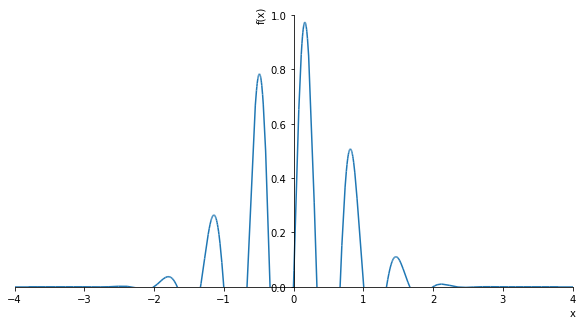

In [67]:
# ex 5.28
x1 = np.linspace(-4,4, 10)
t = 0
eqn1 = eqn1.subs('x', x1)
eqn1 = eqn1.subs('t', 0)
plot(eqn1, (x, -4, 4))



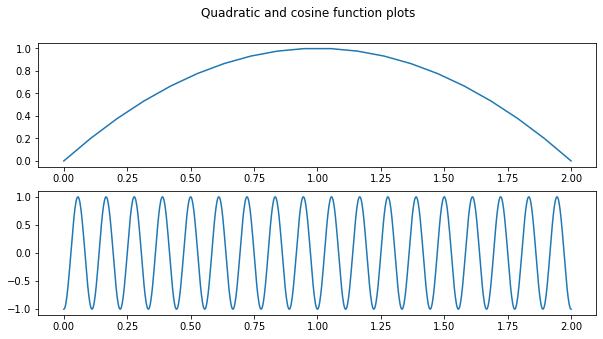

In [47]:
#Exercise 5.29
x1 = np.linspace(0, 2, 20)
y1 = x1*(2 - x1)
x2 = np.linspace(0, 2, 1000)
y2 = np.cos(18*np.pi*x2)

fig, axs = plt.subplots(2)
fig.suptitle('Quadratic and cosine function plots')
axs[0].plot(x1, y1)
axs[1].plot(x2, -y2)


They are different functions with different frequencies, so the plots are different


In [ ]:
#Exercise 5.30
